In [1]:
import pandas as pd

users = pd.read_csv(r'D:\edupro_project\Data\EduPro Online Platform.xlsx - Users.csv')
teachers = pd.read_csv(r'D:\edupro_project\Data\EduPro Online Platform.xlsx - Teachers.csv')
courses = pd.read_csv(r'D:\edupro_project\Data\EduPro Online Platform.xlsx - Courses.csv')
transactions = pd.read_csv(r'D:\edupro_project\Data\EduPro Online Platform.xlsx - Transactions.csv')

In [10]:
users.shape
teachers.shape
courses.shape
transactions.shape

(10000, 7)

Data Integrity

In [12]:
transactions['UserID'].isin(users['UserID']).value_counts()

UserID
True    10000
Name: count, dtype: int64

In [13]:
transactions['CourseID'].isin(courses['CourseID']).value_counts()

CourseID
True    10000
Name: count, dtype: int64

In [14]:
transactions['TeacherID'].isin(teachers['TeacherID']).value_counts()

TeacherID
True    10000
Name: count, dtype: int64

In [16]:
master_df = transactions.merge(users, on='UserID',how='left').merge(courses, on='CourseID', how='left').merge(teachers, on='TeacherID', how='left')
master_df.head()
master_df.shape

(10000, 24)

In [17]:
master_df.isnull().sum()

TransactionID        0
UserID               0
CourseID             0
TransactionDate      0
Amount               0
PaymentMethod        0
TeacherID            0
UserName             0
Age_x                0
Gender_x             0
Email                0
CourseName           0
CourseCategory       0
CourseType           0
CourseLevel          0
CoursePrice          0
CourseDuration       0
CourseRating         0
TeacherName          0
Age_y                0
Gender_y             0
Expertise            0
YearsOfExperience    0
TeacherRating        0
dtype: int64

In [18]:
master_df.head(10)

,TransactionID,UserID,CourseID,TransactionDate,Amount,PaymentMethod,TeacherID,UserName,Age_x,Gender_x,...,CourseLevel,CoursePrice,CourseDuration,CourseRating,TeacherName,Age_y,Gender_y,Expertise,YearsOfExperience,TeacherRating
0,TT00001,U00003,CR00016,25/10/2025,0.00,PayPal,TC00040,morrisonamanda,33,Female,...,Intermediate,0.00,42.68,4.72,Kimberly Miller,49,Male,Cybersecurity,24,4.58
1,TT00002,U00003,CR00037,13/1/2025,0.00,PayPal,TC00040,morrisonamanda,33,Female,...,Intermediate,0.00,33.93,3.45,Kimberly Miller,49,Male,Cybersecurity,24,4.58
2,TT00003,U00003,CR00019,28/3/2025,0.00,Bank Transfer,TC00040,morrisonamanda,33,Female,...,Advanced,0.00,18.00,2.98,Kimberly Miller,49,Male,Cybersecurity,24,4.58
3,TT00004,U00004,CR00048,2/6/2025,0.00,Bank Transfer,TC00040,fthornton,23,Female,...,Beginner,0.00,42.70,3.64,Kimberly Miller,49,Male,Cybersecurity,24,4.58
4,TT00005,U00004,CR00060,10/8/2025,0.00,PayPal,TC00042,fthornton,23,Female,...,Beginner,0.00,8.95,2.14,Yolanda Levine,49,Female,Machine Learning,21,4.97
5,TT00006,U00004,CR00042,30/10/2025,0.00,Credit Card,TC00042,fthornton,23,Female,...,Intermediate,0.00,34.83,4.10,Yolanda Levine,49,Female,Machine Learning,21,4.97
6,TT00007,U00004,CR00017,9/5/2025,0.00,Bank Transfer,TC00042,fthornton,23,Female,...,Advanced,0.00,29.37,4.79,Yolanda Levine,49,Female,Machine Learning,21,4.97
7,TT00008,U00004,CR00025,7/5/2025,299.57,Credit Card,TC00040,fthornton,23,Female,...,Beginner,299.57,48.32,3.74,Kimberly Miller,49,Male,Cybersecurity,24,4.58
8,TT00009,U00013,CR00003,5/10/2025,0.00,PayPal,TC00040,cherrykathleen,33,Female,...,Beginner,0.00,19.53,3.85,Kimberly Miller,49,Male,Cybersecurity,24,4.58
9,TT00010,U00013,CR00032,29/9/2025,0.00,Bank Transfer,TC00040,cherrykathleen,33,Female,...,Advanced,0.00,16.74,2.38,Kimberly Miller,49,Male,Cybersecurity,24,4.58


In [19]:
master_df = master_df.rename(columns={
    'Age_x':'UserAge',
    'Gender_x':'UserGender',
    'Age_y':'TeacherAge',
    'Gender_y':'TeacherGender'
})

Total Enrollments

In [20]:
total_enrollments = master_df['TransactionID'].count()
total_enrollments

np.int64(10000)

In [21]:
master_df['UserID'].nunique()

3000

In [24]:
master_df.groupby('UserID')['TransactionID'].count().mean()
master_df.groupby('UserID')['TransactionID'].count().describe()

count    3000.000000
mean        3.333333
std         4.352149
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        16.000000
Name: TransactionID, dtype: float64

In [25]:
enroll_counts = master_df.groupby('UserID')['TransactionID'].count()

print("Users with 1 course:", (enroll_counts == 1).sum())
print("Users with 5+ courses:", (enroll_counts >= 5).sum())
print("Users with 10+ courses:", (enroll_counts >= 10).sum())


Users with 1 course: 1620
Users with 5+ courses: 454
Users with 10+ courses: 453


In [26]:
print("Users with 1 course:", (enroll_counts == 1).sum())
print("Users with 2-3 courses:", ((enroll_counts >= 2) & (enroll_counts <= 3)).sum())
print("Users with 4-5 courses:", ((enroll_counts >= 4) & (enroll_counts <= 5)).sum())
print("Users with 6-10 courses:", ((enroll_counts >= 6) & (enroll_counts <= 10)).sum())
print("Users with 10+ courses:", (enroll_counts >= 10).sum())


Users with 1 course: 1620
Users with 2-3 courses: 798
Users with 4-5 courses: 128
Users with 6-10 courses: 5
Users with 10+ courses: 453


In [27]:
total_users = enroll_counts.count()

print("1 course %:", (enroll_counts == 1).sum() / total_users * 100)
print("5+ courses %:", (enroll_counts >= 5).sum() / total_users * 100)


1 course %: 54.0
5+ courses %: 15.133333333333333


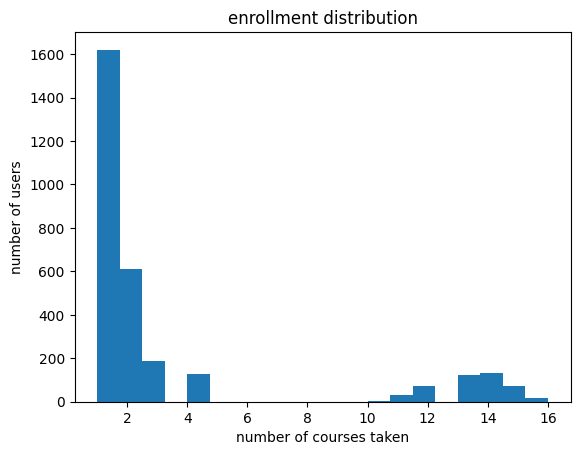

In [28]:
import matplotlib.pyplot as plt

plt.hist(enroll_counts,bins=20)
plt.xlabel('number of courses taken')
plt.ylabel('number of users')
plt.title('enrollment distribution')
plt.show()

In [29]:
users.shape

(3000, 5)

In [30]:
users['Age'].describe()

count    3000.000000
mean       24.974333
std         6.046475
min        15.000000
25%        20.000000
50%        25.000000
75%        30.000000
max        35.000000
Name: Age, dtype: float64

1 learner demographic intelligence

In [31]:
bins = [0,18,25,35,45,100]
labels = ['<18','18-25','26-35','36-45','45+']

users['AgeBand'] = pd.cut(users['Age'],bins=bins,labels=labels)

In [32]:
users['AgeBand'].value_counts()

AgeBand
26-35    1446
18-25     985
<18       569
36-45       0
45+         0
Name: count, dtype: int64

In [33]:
users['AgeBand'].value_counts(normalize=True)*100

AgeBand
26-35    48.200000
18-25    32.833333
<18      18.966667
36-45     0.000000
45+       0.000000
Name: proportion, dtype: float64

In [34]:
users['Gender'].value_counts()
users['Gender'].value_counts(normalize=True)*100

Gender
Female    50.666667
Male      49.333333
Name: proportion, dtype: float64

In [35]:
pd.crosstab(users['AgeBand'], users['Gender'], normalize='index')*100


Gender,Female,Male
AgeBand,,
<18,49.560633,50.439367
18-25,50.862944,49.137056
26-35,50.968188,49.031812


2 course demand intelligence

In [37]:
master_df['CourseCategory'].value_counts(normalize=True)*100

CourseCategory
Data Science               9.16
Finance                    8.64
Web Development            8.44
Business                   8.33
Artificial Intelligence    8.29
Project Management         8.29
Design                     8.27
Cybersecurity              8.19
Machine Learning           8.19
Digital Marketing          8.08
Marketing                  8.06
Programming                8.06
Name: proportion, dtype: float64

In [38]:
master_df['CourseLevel'].value_counts(normalize=True)*100

CourseLevel
Beginner        35.73
Advanced        34.75
Intermediate    29.52
Name: proportion, dtype: float64

In [39]:
master_df['CourseType'].value_counts(normalize=True)*100

CourseType
Free    64.03
Paid    35.97
Name: proportion, dtype: float64

3 Demographic x Preferences

In [43]:
bins = [0,18,25,35,45,100]
labels = ['<18','18-25','26-35','36-45','45+']

master_df['AgeBand'] = pd.cut(master_df['UserAge'], 
                              bins=bins, 
                              labels=labels)


In [44]:
pd.crosstab(master_df['AgeBand'],
            master_df['CourseLevel'],
            normalize='index')*100


CourseLevel,Advanced,Beginner,Intermediate
AgeBand,,,
<18,35.662898,34.583762,29.753340
18-25,35.023041,36.036866,28.940092
26-35,34.194624,35.986664,29.818712


In [45]:
pd.crosstab(master_df['AgeBand'],master_df['CourseCategory'], normalize='index')*100    

CourseCategory,Artificial Intelligence,Business,Cybersecurity,Data Science,Design,Digital Marketing,Finance,Machine Learning,Marketing,Programming,Project Management,Web Development
AgeBand,,,,,,,,,,,,
<18,9.044193,7.965057,8.478931,8.581706,8.119219,8.581706,8.890031,7.862282,8.376156,7.708119,7.810894,8.581706
18-25,8.294931,8.356375,8.079877,8.909370,8.387097,7.864823,7.987711,8.356375,8.479263,8.110599,7.956989,9.216590
26-35,7.980829,8.460096,8.147531,9.564493,8.251719,8.022505,8.981038,8.210044,7.647427,8.168368,8.710148,7.855803


4 Revenue & monetization

In [46]:
master_df.groupby('AgeBand')['Amount'].sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8216\2096199582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  master_df.groupby('AgeBand')['Amount'].sum()


AgeBand
<18      185320.89
18-25    289750.70
26-35    436251.88
36-45         0.00
45+           0.00
Name: Amount, dtype: float64

In [47]:
master_df.groupby('CourseCategory')['Amount'].sum().sort_values(ascending=False)

CourseCategory
Artificial Intelligence    202750.67
Business                   181527.58
Project Management         169103.21
Programming                 77453.92
Data Science                77052.32
Cybersecurity               59139.00
Digital Marketing           56261.32
Design                      43113.72
Finance                     28106.20
Web Development             16682.15
Machine Learning              133.38
Marketing                       0.00
Name: Amount, dtype: float64

In [49]:
master_df.groupby('CourseLevel')['Amount'].sum()

CourseLevel
Advanced        278036.18
Beginner        369021.38
Intermediate    264265.91
Name: Amount, dtype: float64

In [50]:
pd.crosstab(master_df['AgeBand'], master_df['CourseType'], normalize='index')*100


CourseType,Free,Paid
AgeBand,,
<18,62.178828,37.821172
18-25,64.761905,35.238095
26-35,64.284226,35.715774
